# Final Project CS209b
## EDA Flu data:
### Benjamin Levy, Will Fried, Dimitris Vamvourellis & Matthieu Meeus

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import csv
plt.rcParams.update({'font.size': 18})

## Data Loading

First we will load the data from all states into one single dataframe.

wili stands for weekly influenza-like illness. I think the value corresponds to the percent of visits to healthcare providers that are for the flu (https://www.cdc.gov/flu/weekly/index.htm) but I'm not sure.

In [2]:
flu_dir = '../flu_ground_truth/'
filename = 'wILI_cleaned_Alabama.csv'
with open(flu_dir + filename, 'r') as f:
    weeks = [row.split(',')[0] for row in f][1:]
week2cnt = {weeks[i]: i for i in range(len(weeks))}

FileNotFoundError: [Errno 2] No such file or directory: '../flu_ground_truth/wILI_cleaned_Alabama.csv'

In [48]:
location2info = {}
for filename in os.listdir(flu_dir):
    location = filename.replace('.csv', '').split('_')[-1]
    with open(flu_dir + filename, 'r') as f:
        rows = list(csv.reader(f))
        time2wili = {row[0]: float(row[1]) for row in rows[1:]}
        location2info[location] = time2wili

In [49]:
df = pd.DataFrame.from_dict(location2info)

In [50]:
df.rename(index=week2cnt, inplace=True)
df.sort_index(inplace=True)

In [51]:
df.head()

,Texas,Louisiana,Washington,New Jersey,Arkansas,Montana,North Dakota,Virgin Islands,Nebraska,New Mexico,Indiana,California,Ohio,South Carolina,Puerto Rico,Rhode Island,Michigan,Georgia,Wyoming,Hawaii,New Hampshire,Maryland,Mississippi,Connecticut,West Virginia,Iowa,Illinois,Vermont,Tennessee,Missouri,Wisconsin,North Carolina,Pennsylvania,Kentucky,Delaware,Kansas,Oregon,Massachusetts,Alabama,Alaska,Arizona,Minnesota,Maine,Nevada,Idaho,Utah,Virginia,New York,District of Columbia,Oklahoma,South Dakota,New York City,Colorado
0,2.06514,2.28108,0.510041,2.31534,0.696056,0.037119,0.671355,NaN,2.199780,2.13191,0.518962,1.95412,0.228257,0.446127,NaN,0.235036,0.671831,1.60490,0.632911,1.029340,0.075930,1.31920,2.90980,0.078309,1.59741,0.563063,1.28205,1.47641,0.274655,1.101760,0.465022,0.531430,0.703292,0.142932,0.100125,0.442227,0.551334,0.604621,2.13477,0.875146,0.674721,0.574800,0.357724,1.66683,0.414938,0.747696,1.14343,0.262990,2.80877,0.624179,1.102750,1.18222,0.660684
1,2.09394,2.04776,1.040070,2.47836,0.674157,0.180963,0.721961,NaN,2.735320,1.96350,0.653137,2.15266,0.361628,0.765523,NaN,0.201545,0.585011,1.71307,0.440621,1.752460,0.092464,2.09879,2.97075,0.238095,1.58968,0.860956,1.45089,1.35777,0.499492,0.930521,0.581832,0.536530,0.910726,0.223975,0.368550,0.577490,0.624076,0.887866,2.05999,1.128270,0.749939,0.541293,0.434855,1.63633,1.457980,0.410939,1.23653,0.369729,2.89079,0.958678,0.793794,1.40230,0.628621
2,2.10072,2.42974,0.904393,2.24812,0.514217,0.185874,0.567477,NaN,3.311030,1.67486,0.584346,2.24173,0.523560,0.389430,NaN,0.362845,0.524238,2.01249,0.441798,0.755124,0.293610,1.45439,2.98141,0.374158,1.52672,0.407000,1.56607,1.48221,0.499550,0.989890,1.188220,0.457107,0.881081,0.156152,0.337025,0.479750,0.484848,0.744806,1.94224,0.586042,0.953365,0.521162,0.421743,1.50860,1.408140,0.440583,1.22545,0.362121,2.41042,2.070390,0.791023,1.29124,0.804020
3,2.20655,1.92854,0.955110,2.79286,0.413650,0.036390,0.339239,NaN,2.057610,2.35498,0.581084,1.91748,0.329518,0.418354,NaN,0.322675,0.921435,2.38747,0.490305,1.574340,0.178795,1.26769,3.14804,0.333542,1.81171,0.183225,1.45762,1.44393,0.401638,0.959713,1.010490,0.511163,0.721180,0.150108,0.460494,0.538071,0.751771,0.783721,2.27650,0.967742,0.888804,0.637716,0.338409,2.14451,1.280070,0.755957,1.26902,0.358981,3.11632,1.670730,0.801311,1.30236,0.909658
4,2.36381,2.80934,0.786370,1.82877,1.090280,0.040519,0.713749,NaN,0.376712,2.37983,0.842254,2.52326,0.831798,0.445310,NaN,0.530256,0.863417,2.65614,0.566636,1.773980,0.294372,1.45386,3.35570,0.396743,1.83986,0.358780,1.48930,1.25276,0.528096,1.167680,1.096490,0.649925,0.991455,0.289678,0.222332,0.481289,0.764895,0.812421,2.83371,0.683851,1.185730,0.805802,0.176471,1.76761,1.827240,0.651859,1.26547,0.527357,2.99118,1.628450,0.779833,1.51508,0.971705


In [52]:
df.isna().sum()

Texas                     0
Louisiana                 0
Washington                0
New Jersey                0
Arkansas                  0
Montana                   0
North Dakota              0
Virgin Islands           52
Nebraska                  0
New Mexico                0
Indiana                   0
California                0
Ohio                      0
South Carolina            0
Puerto Rico             156
Rhode Island              0
Michigan                  0
Georgia                   0
Wyoming                   0
Hawaii                    0
New Hampshire             0
Maryland                  0
Mississippi               0
Connecticut               0
West Virginia             0
Iowa                      0
Illinois                  0
Vermont                   0
Tennessee                 0
Missouri                  0
Wisconsin                 0
North Carolina            0
Pennsylvania              0
Kentucky                  0
Delaware                  0
Kansas              

In [53]:
df = df.fillna(df.mean())

In [54]:
df.isna().sum()

Texas                   0
Louisiana               0
Washington              0
New Jersey              0
Arkansas                0
Montana                 0
North Dakota            0
Virgin Islands          0
Nebraska                0
New Mexico              0
Indiana                 0
California              0
Ohio                    0
South Carolina          0
Puerto Rico             0
Rhode Island            0
Michigan                0
Georgia                 0
Wyoming                 0
Hawaii                  0
New Hampshire           0
Maryland                0
Mississippi             0
Connecticut             0
West Virginia           0
Iowa                    0
Illinois                0
Vermont                 0
Tennessee               0
Missouri                0
Wisconsin               0
North Carolina          0
Pennsylvania            0
Kentucky                0
Delaware                0
Kansas                  0
Oregon                  0
Massachusetts           0
Alabama     

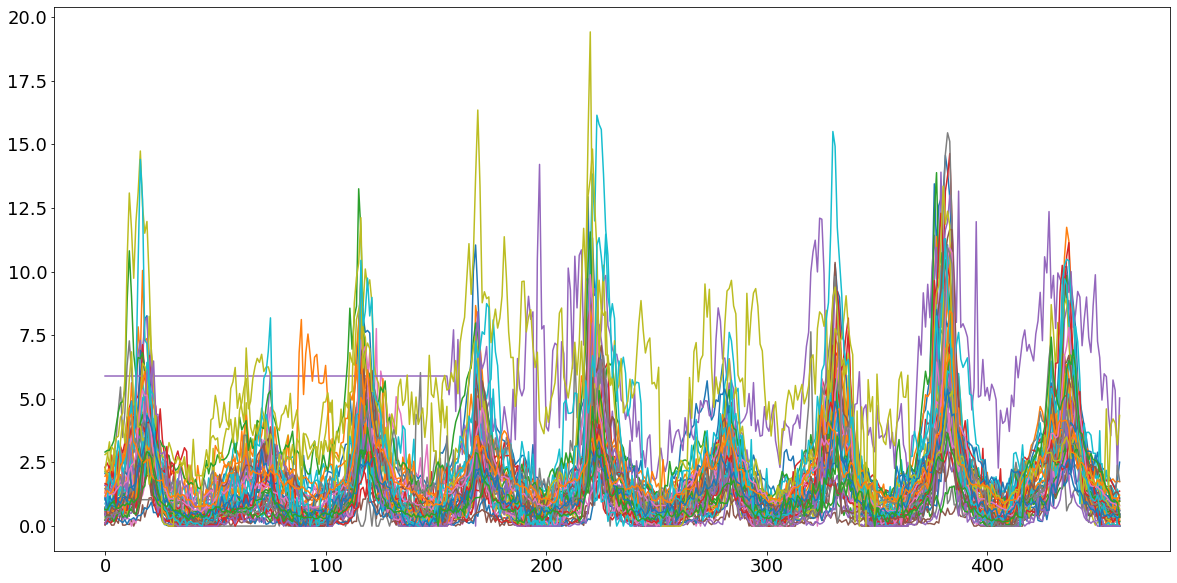

In [55]:
plt.figure(figsize=(20, 10))
for col in df.columns:
    data = df.loc[df[col].notnull(), col]
    plt.plot(list(data.index), list(data))
plt.show()

In [ ]:
weeks = list(week2cnt.keys())
beginning_december_week = weeks.index('2010-48')
end_march_week = beginning_december_week + 17

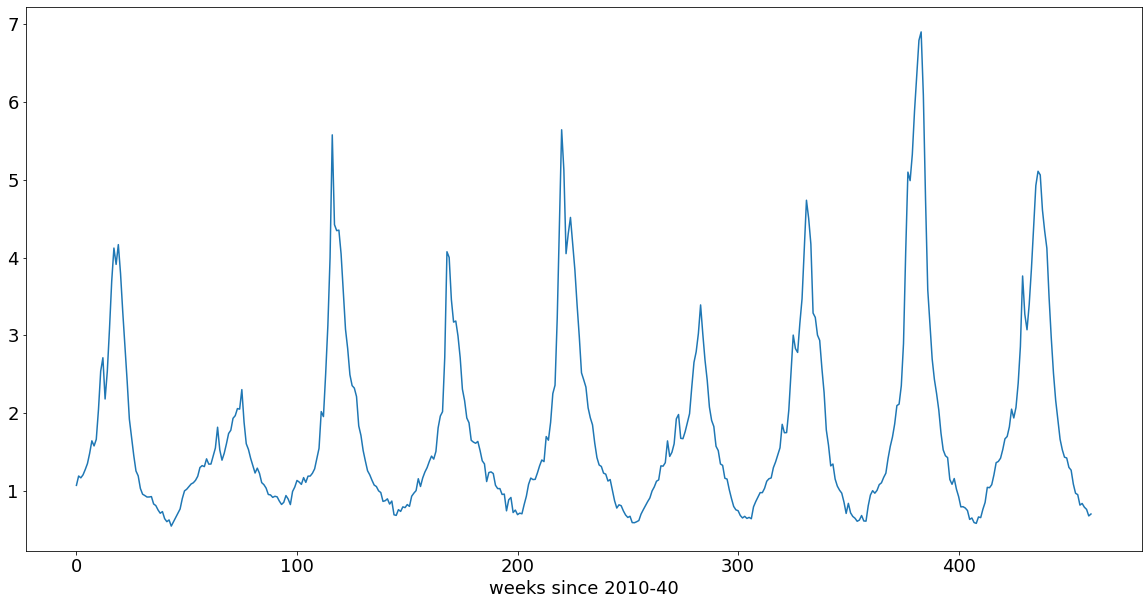

In [56]:
month_avg = []
for idx in df.index:
    month_data = df.loc[idx, :]
    month_data = [x for x in month_data if not pd.isnull(x)]
    month_avg.append(np.mean(month_data))

plt.figure(figsize=(20, 10))
plt.plot(df.index, month_avg)
plt.xlabel('weeks since 2010-40')
plt.ylabel('')
plt.show()

In [17]:
correlation_df = df.corr()

In [18]:
correlation_df

,Texas,Louisiana,Washington,New Jersey,Arkansas,Montana,North Dakota,Virgin Islands,Nebraska,New Mexico,Indiana,California,Ohio,South Carolina,Puerto Rico,Rhode Island,Michigan,Georgia,Wyoming,Hawaii,New Hampshire,Maryland,Mississippi,Connecticut,West Virginia,Iowa,Illinois,Vermont,Tennessee,Missouri,Wisconsin,North Carolina,Pennsylvania,Kentucky,Delaware,Kansas,Oregon,Massachusetts,Alabama,Alaska,Arizona,Minnesota,Maine,Nevada,Idaho,Utah,Virginia,New York,District of Columbia,Oklahoma,South Dakota,New York City,Colorado
Texas,1.000000,0.880996,0.732274,0.724056,0.885197,0.565180,0.650897,0.233614,0.577498,0.812113,0.884414,0.698371,0.839212,0.828033,0.479169,0.759376,0.810042,0.776738,0.830656,0.559563,0.662311,0.501325,0.829548,0.744177,0.854991,0.760745,0.833891,0.565183,0.842745,0.898218,0.796179,0.851593,0.822848,0.783148,0.654674,0.897830,0.759105,0.799949,0.742456,0.596218,0.730329,0.807509,0.617528,0.655938,0.613905,0.628882,0.866819,0.785528,0.358585,0.805564,0.792406,0.781436,0.683840
Louisiana,0.880996,1.000000,0.731819,0.698620,0.864741,0.644817,0.614086,0.151588,0.638974,0.792810,0.853704,0.736617,0.797664,0.782057,0.529055,0.704715,0.709518,0.756793,0.812425,0.470190,0.581822,0.454023,0.882252,0.644808,0.812722,0.761982,0.800655,0.531953,0.809285,0.852569,0.696457,0.781620,0.729478,0.737047,0.639687,0.780965,0.746769,0.763457,0.781170,0.636368,0.673982,0.721514,0.606652,0.705327,0.639562,0.668042,0.819227,0.676698,0.232639,0.782764,0.701458,0.733463,0.724751
Washington,0.732274,0.731819,1.000000,0.701644,0.752724,0.596307,0.636819,0.143490,0.605071,0.779465,0.738786,0.822578,0.719005,0.612657,0.487057,0.665028,0.668132,0.579545,0.763072,0.601519,0.515461,0.423141,0.657628,0.600053,0.813047,0.791825,0.741658,0.606290,0.678804,0.823136,0.697966,0.652156,0.749857,0.587154,0.638499,0.751661,0.782698,0.721474,0.657446,0.506154,0.648756,0.706882,0.590181,0.776840,0.738725,0.656155,0.736780,0.697561,0.209442,0.723286,0.744517,0.693352,0.637631
New Jersey,0.724056,0.698620,0.701644,1.000000,0.757738,0.495456,0.593221,0.162178,0.632625,0.758496,0.766589,0.630854,0.744488,0.807644,0.568865,0.810470,0.761882,0.768073,0.788090,0.492617,0.740406,0.344172,0.612925,0.750103,0.750291,0.738747,0.670800,0.524923,0.713632,0.762239,0.703336,0.758379,0.803519,0.731921,0.673443,0.776402,0.708183,0.859382,0.595525,0.627874,0.678250,0.756377,0.581283,0.697037,0.499963,0.486683,0.824146,0.872614,0.161666,0.734665,0.775302,0.832008,0.688484
Arkansas,0.885197,0.864741,0.752724,0.757738,1.000000,0.595704,0.640490,0.186137,0.567605,0.854288,0.882082,0.751528,0.828334,0.786256,0.444693,0.760306,0.764576,0.746748,0.820662,0.616122,0.639924,0.465314,0.809301,0.725066,0.882349,0.762374,0.821455,0.590707,0.845184,0.871548,0.789971,0.837531,0.834016,0.740648,0.693146,0.892521,0.764314,0.807926,0.804513,0.602480,0.709991,0.811023,0.622546,0.722494,0.694346,0.604639,0.847871,0.792581,0.301509,0.866663,0.825016,0.737640,0.679171
Montana,0.565180,0.644817,0.596307,0.495456,0.595704,1.000000,0.574817,0.103740,0.484918,0.618011,0.537163,0.513297,0.507246,0.474706,0.306562,0.596806,0.466300,0.399780,0.566075,0.381320,0.452285,0.264345,0.453174,0.505451,0.588967,0.570332,0.432079,0.532521,0.508685,0.564366,0.467801,0.498658,0.528626,0.517008,0.498629,0.512482,0.575677,0.589925,0.394808,0.561561,0.460980,0.541996,0.669365,0.585202,0.555274,0.738687,0.605389,0.414617,0.139375,0.562790,0.429132,0.494529,0.817614
North Dakota,0.650897,0.614086,0.636819,0.593221,0.640490,0.574817,1.000000,0.036153,0.616501,0.628097,0.627172,0.619946,0.670946,0.512381,0.417219,0.610472,0.736354,0.455009,0.666156,0.520799,0.520452,0.391114,0.583269,0.539704,0.675117,0.693314,0.618148,0.654406,0.615789,0.665883,0.569479,0.587366,0.687873,0.506097,0.637918,0.684912,0.597626,0.652899,0.483371,0.400551,0.495941,0.634140,0.618903,0.611734,0.529083,0.628518,0.672125,0.633610,0.242765,0.654907,0.604309,0.615629,0.582111
Virgin Islands,0.233614,0.151588,0.143490,0.162178,0.186137,0.1037

In [63]:
mean_wili_df = pd.DataFrame(df.mean(), columns=['Mean WILI']).reset_index()
mean_wili_df = mean_wili_df.rename(columns={'index':'State_full'})
mean_wili_df

,State_full,Mean WILI
0,Texas,3.367715
1,Louisiana,2.832676
2,Washington,0.889057
3,New Jersey,2.291986
4,Arkansas,1.974072
5,Montana,0.337468
6,North Dakota,1.145667
7,Virgin Islands,1.037447
8,Nebraska,1.885897
9,New Mexico,2.166363


In [36]:
states_lat_long = pd.read_csv('../data/raw/statelatlong.csv')

In [62]:
states_lat_long = states_lat_long.rename(columns={"Latitude": "latitude", "Longitude": "longitude", "City":"State_full"})
states_lat_long

,State,latitude,longitude,State_full
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California
5,CO,38.997934,-105.550567,Colorado
6,CT,41.518784,-72.757507,Connecticut
7,DE,39.145251,-75.418921,Delaware
8,DC,38.899349,-77.014567,District of Columbia
9,FL,27.975728,-83.833017,Florida


In [64]:
mean_wili_by_state_df = pd.merge(states_lat_long, mean_wili_df, how='inner', on='State_full')

,State,latitude,longitude,State_full,Mean WILI
0,AL,32.601011,-86.680736,Alabama,3.360839
1,AK,61.302501,-158.775020,Alaska,1.603868
2,AZ,34.168219,-111.930907,Arizona,1.770105
3,AR,34.751928,-92.131378,Arkansas,1.974072
4,CA,37.271875,-119.270415,California,2.327350
5,CO,38.997934,-105.550567,Colorado,1.179937
6,CT,41.518784,-72.757507,Connecticut,1.450287
7,DE,39.145251,-75.418921,Delaware,0.528819
8,DC,38.899349,-77.014567,District of Columbia,4.653967
9,GA,32.678125,-83.222976,Georgia,2.146822


In [65]:
correlation_df.loc['Texas']

Texas                   1.000000
Louisiana               0.880996
Washington              0.732274
New Jersey              0.724056
Arkansas                0.885197
Montana                 0.565180
North Dakota            0.650897
Virgin Islands          0.233614
Nebraska                0.577498
New Mexico              0.812113
Indiana                 0.884414
California              0.698371
Ohio                    0.839212
South Carolina          0.828033
Puerto Rico             0.479169
Rhode Island            0.759376
Michigan                0.810042
Georgia                 0.776738
Wyoming                 0.830656
Hawaii                  0.559563
New Hampshire           0.662311
Maryland                0.501325
Mississippi             0.829548
Connecticut             0.744177
West Virginia           0.854991
Iowa                    0.760745
Illinois                0.833891
Vermont                 0.565183
Tennessee               0.842745
Missouri                0.898218
Wisconsin 

In [73]:
corr_state_df = pd.DataFrame(correlation_df.loc['Texas']).reset_index().rename(columns={'index':'State_full'})
pd.merge(states_lat_long, corr_state_df, how='inner', on='State_full')

,State,latitude,longitude,State_full,Texas
0,AL,32.601011,-86.680736,Alabama,0.742456
1,AK,61.302501,-158.775020,Alaska,0.596218
2,AZ,34.168219,-111.930907,Arizona,0.730329
3,AR,34.751928,-92.131378,Arkansas,0.885197
4,CA,37.271875,-119.270415,California,0.698371
5,CO,38.997934,-105.550567,Colorado,0.683840
6,CT,41.518784,-72.757507,Connecticut,0.744177
7,DE,39.145251,-75.418921,Delaware,0.654674
8,DC,38.899349,-77.014567,District of Columbia,0.358585
9,GA,32.678125,-83.222976,Georgia,0.776738
